<a href="https://colab.research.google.com/github/luizvmachado/br-regression-project/blob/master/Regress%C3%A3o_Awari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Planejamento

## 2. Importando Base

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url_csv = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'

In [ ]:
housing = pd.read_csv(url_csv)

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

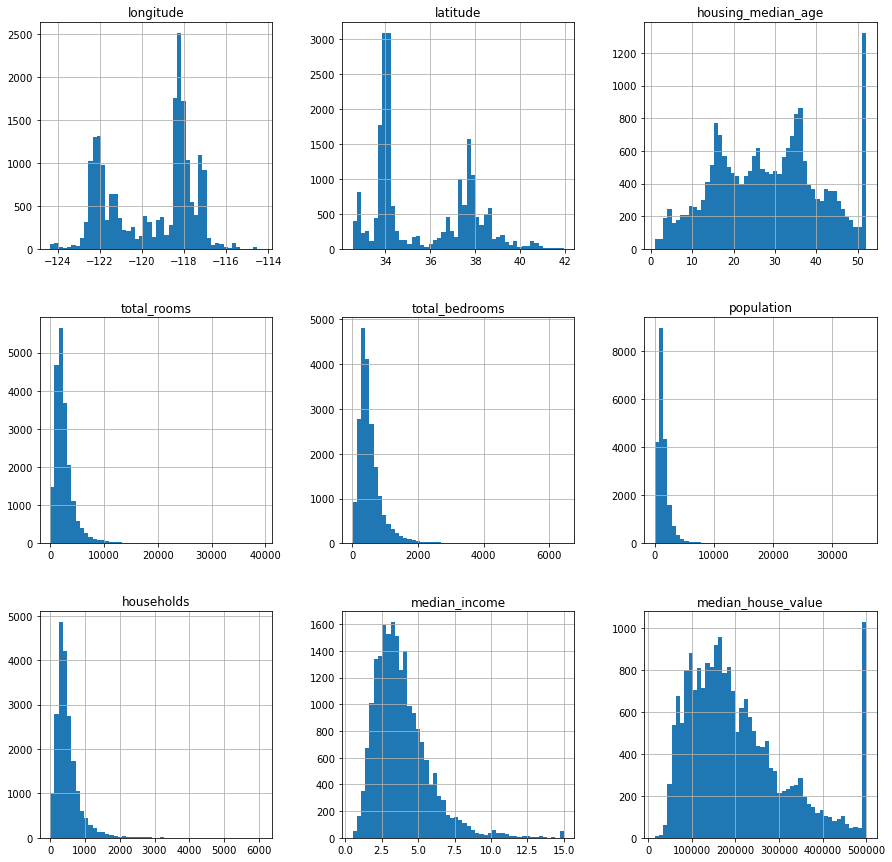

In [ ]:
housing.hist(bins = 50, figsize = (15,15))

## 3. Preparando Base

In [ ]:
housing['income_cat'] = pd.cut(housing.median_income,
                            bins = [0.,1.5,3.0,4.5,6., np.inf],
                            labels = [1,2,3,4,5])

<AxesSubplot:>

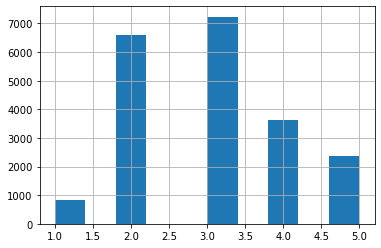

In [ ]:
housing.income_cat.hist()

In [ ]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(housing,
                                       random_state = 42,
                                       test_size = 0.2,
                                       stratify= housing['income_cat']
                                      )

In [ ]:
len(train_set)/len(housing)

0.8

In [ ]:
train_set.income_cat.value_counts(normalize=True)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [ ]:
test_set.drop('income_cat', axis = 1, inplace = True)

In [ ]:
train_set.drop('income_cat', axis = 1, inplace = True)

## 4. Análise exploratória dos dados

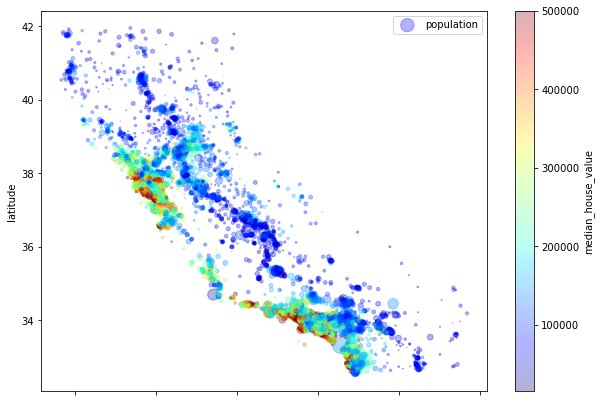

In [ ]:
train_set.plot(kind = 'scatter',
               x = 'longitude',
               y='latitude',
               alpha = 0.3,
               s=train_set['population']/100,
               label = 'population',
               figsize = (10,7),
               c='median_house_value',
               cmap=plt.get_cmap('jet'),
               colorbar = True)
plt.legend()

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

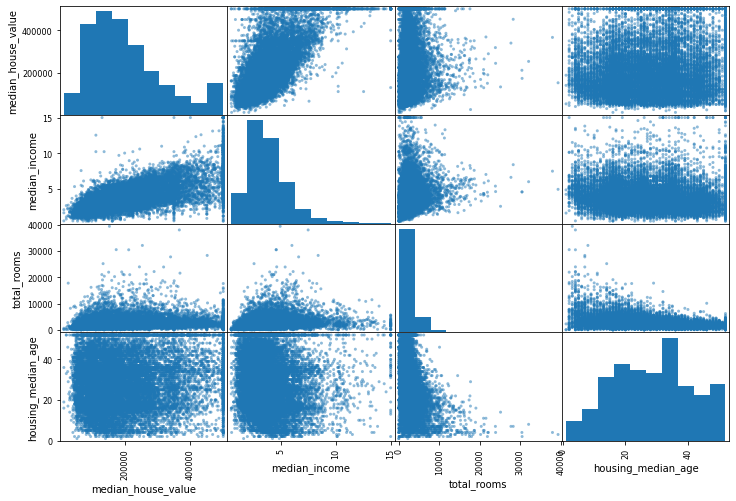

In [ ]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(train_set[attributes], figsize = (12,8))

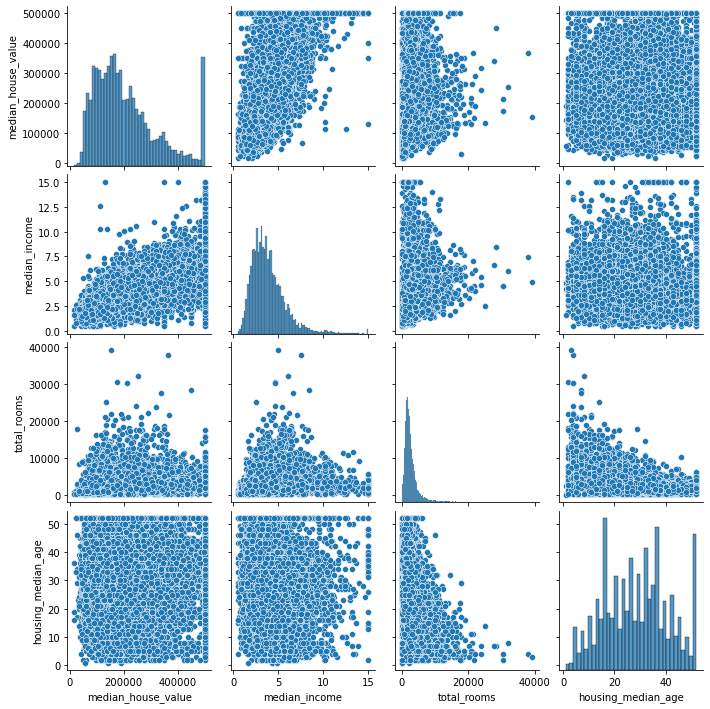

In [ ]:
sns.pairplot(train_set[attributes])

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

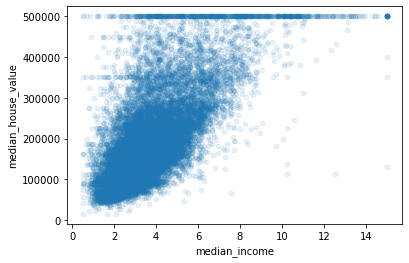

In [ ]:
train_set.plot(kind = 'scatter', x='median_income', y='median_house_value', alpha = 0.1)

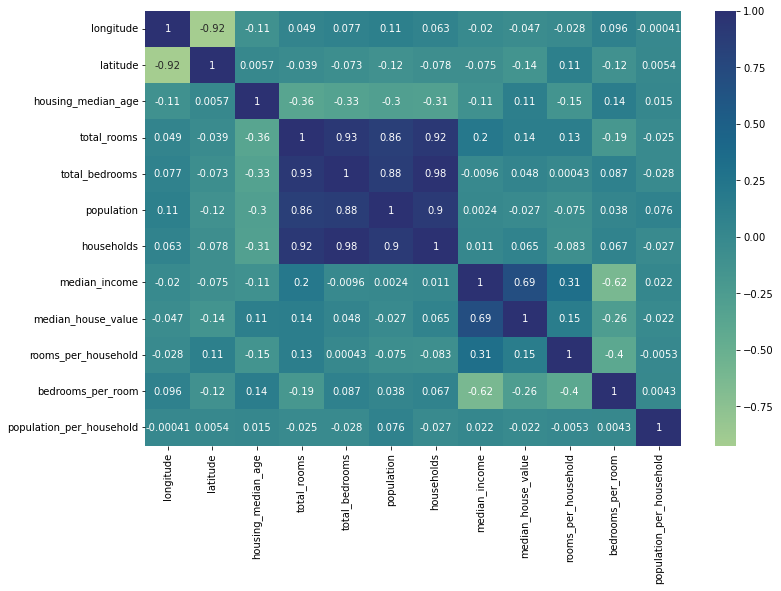

In [ ]:
ax =sns.heatmap(train_set.corr(), annot = True, cmap = 'crest')
ax.figure.set_size_inches(12, 8)

In [ ]:
train_set.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Preparando os dados

In [ ]:
#SEPARANDO EM X E Y
X_train = train_set.drop('median_house_value', axis = 1)
y_train = train_set.median_house_value

X_test = test_set.drop('median_house_value', axis = 1)
y_test = test_set.median_house_value

In [ ]:
X_train.shape[1] == X_test.shape[1]

True

In [ ]:
#TRATANDO VALORES NULOS PELA MEDIANA
X_train.fillna(X_train.median(), inplace = True)
X_test.fillna(X_train.median(), inplace = True)

C:\Users\Vitor\AppData\Local\Temp\ipykernel_11364\2944893834.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.median(), inplace = True)
C:\Users\Vitor\AppData\Local\Temp\ipykernel_11364\2944893834.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_train.median(), inplace = True)


In [ ]:
X_train.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [ ]:
#TRATANDO VALORES CATEGÓRICOS

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,6.715625,0.156972,2.275000,1,0,0,0,0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,7.137809,0.151980,3.021201,1,0,0,0,0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,5.283636,0.185822,2.938182,1,0,0,0,0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,5.491694,0.196612,3.561462,1,0,0,0,0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,6.154723,0.162477,2.434853,0,0,0,0,1


In [ ]:
#REMOVENDO COLUNAS CATEGÓRICAS PARA TRATAR COM ROBUST SCALER
num_attributes = X_train.columns[:-5]

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
transformer = RobustScaler()
transformer.fit(X_train[num_attributes])
X_train[num_attributes] = transformer.transform(X_train[num_attributes])
X_test[num_attributes] = transformer.transform(X_test[num_attributes])

<AxesSubplot:>

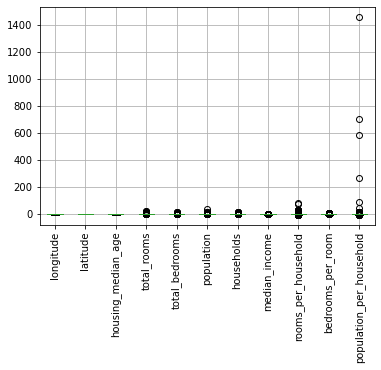

In [ ]:
X_train[num_attributes].boxplot(rot=90)

## 5. Machine Learning

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test.head(10))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mserror = np.sqrt(mean_squared_error(y_test.head(10), y_pred))
mserror

84408.0297621896

In [ ]:
y_pred_train = lin_reg.predict(X_train)

In [ ]:
housing_predictions_train[:5]

array([ 83648.54287152, 305815.0882093 , 150013.37994426, 188096.42566946,
       241840.13952577])

In [ ]:
rmserror2 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmserror2

68160.92435491859

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()

In [ ]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_tree = tree_reg.predict(X_test)
rmserror_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
rmserror_tree

69369.54610969861

In [ ]:
#melhor estimativa com validação cruzada, detectando OVERFITTTING

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(tree_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)

In [ ]:
tree_rmse_scores = np.sqrt(-scores)
print(np.mean(tree_rmse_scores), np.std(tree_rmse_scores))

71106.08284690739 2107.4956812472315


In [ ]:
scores_lin = cross_val_score(lin_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)

In [ ]:
tree_rmse_scores_lin = np.sqrt(-scores_lin)
print(np.mean(tree_rmse_scores_lin), np.std(tree_rmse_scores_lin))

68439.7214102642 2408.892846297476


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
np.sqrt(mean_squared_error(y_train,rf.predict(X_train)))

18675.616975560664

In [ ]:
np.sqrt(mean_squared_error(y_test,rf.predict(X_test)))

48156.01799120912

In [ ]:
scores = cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
print(np.mean(tree_rmse_scores), np.std(tree_rmse_scores))

50272.10594548292 2275.853814720347


In [ ]:
#CALIBRAÇÃO DE MODELOS

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [3,10,30],
    'max_features': [2,4,6,8]},
    {'bootstrap':[False],
     'n_estimators':[3,10],
     'max_features': [2,3,4]}
]

In [ ]:
forest_reg = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(forest_reg,
                          param_grid,
                          cv=5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
np.sqrt(-grid_search.best_score_)

50027.45094179785

## 6. Comunicação de resultados

## 7. Deploy